# Visualize

# 1. Synthetic

In [1]:
disp ('executing gpml startup script...')
mydir = fileparts (mfilename ('fullpath'));                 % where am I located
addpath (mydir)
dirs = {'cov','doc','inf','lik','mean','prior','util'};           % core folders
for d = dirs, addpath (fullfile (mydir, d{1})), end
dirs = {{'util','minfunc'},{'util','minfunc','compiled'}};     % minfunc folders
for d = dirs, addpath (fullfile (mydir, d{1}{:})), end
% addpath([mydir,'/util/sparseinv'])
pkg load statistics

executing gpml startup script...


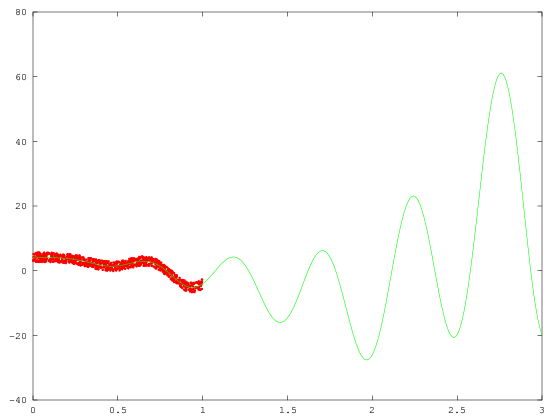

In [14]:
ns = 1000;
x = rand(ns, 1);
y = 5*x.^2.*sin(12*x)+(x.^3-0.5).*sin(3*x-0.5)+4*cos(2*x);  % 20 noisy training targets
noise =  3*(rand(ns, 1)-0.5);
y = y + noise;

hold on
plot(x, y, 'r.')

xs = 0:0.01:3.0;
xs = xs';
ys = 5*xs.^2.*sin(12*xs)+(xs.^3-0.5).*sin(3*xs-0.5)+4*cos(2*xs);  % 20 noisy training targets
plot(xs, ys, 'g');

In [3]:
sf2 = 1 ; ell = 1 ; sn2 = 0.1 ; 
d = size(x,2);
hyp.cov = log([ones(d,1)*ell;sf2]); hyp.lik = log(sn2); hyp.mean = [];
opts.Xnorm = 'N' ; opts.Ynorm = 'N' ;
opts.Ms = 10 ;
opts.ell = ell ; opts.sf2 = sf2 ; opts.sn2 = sn2 ;
opts.meanfunc = []; opts.covfunc = @covSEard; opts.likfunc = @likGauss; opts.inffunc = @infGaussLik ;

In [4]:
meanfunc = [];                    % empty: don't use a mean function
covfunc = opts.covfunc;              % Squared Exponental covariance function
likfunc = opts.likfunc;              % Gaussian likelihood
inffunc = opts.inffunc;

In [5]:
hyp2 = minimize(hyp, @gp, -100, inffunc, meanfunc, covfunc, likfunc, x, y)

Function evaluation     96;  Value 1.281969e+03
hyp2 =

  scalar structure containing the fields:

    cov =

      -1.7720
       1.3068

    lik = -0.16517
    mean = [](0x0)



## Basic visualization

Green line: ground truth. Blue line & grey area: predicted mean and 2 std.

In [6]:
[mu s2] = gp(hyp2, @infGaussLik, meanfunc, covfunc, likfunc, x, y, xs);

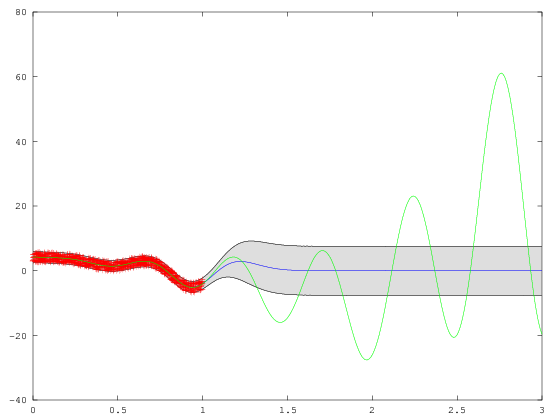

In [15]:
f = [mu+2*sqrt(s2); flipdim(mu-2*sqrt(s2),1)];
fill([xs; flipdim(xs,1)], f, [7 7 7]/8)
hold on; plot(xs, mu); plot(x, y, 'r+');
plot(xs, ys, 'g');

In [8]:
partitionCriterion = 'kmeans'; %, 'kmeans', 'knkmeans'
opts.numOptFC = 25 ;
opts.partitionCriterion = partitionCriterion ;
[models,t_dGP_train] = aggregation_train(x,y,opts) ;

Linesearch     25;  Value 1.325240e+03


## Visualization of each sub-model

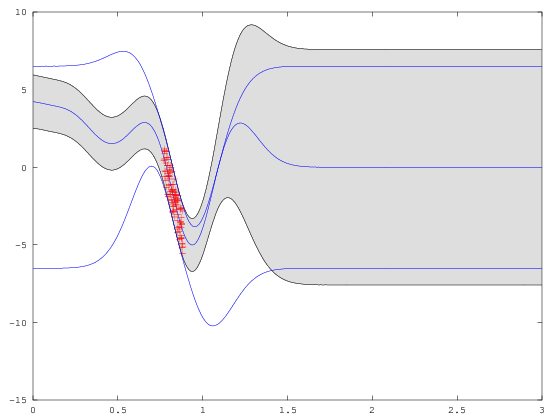

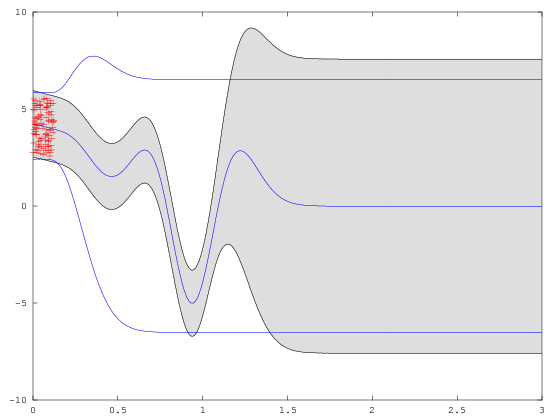

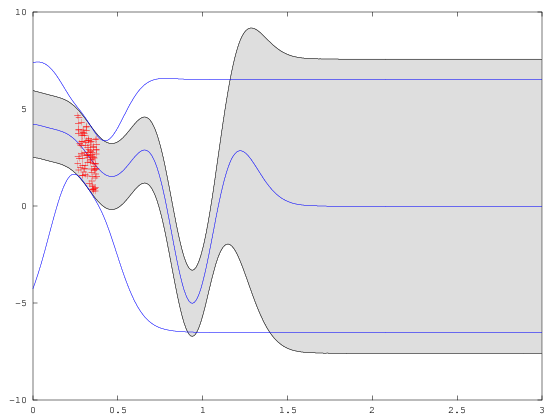

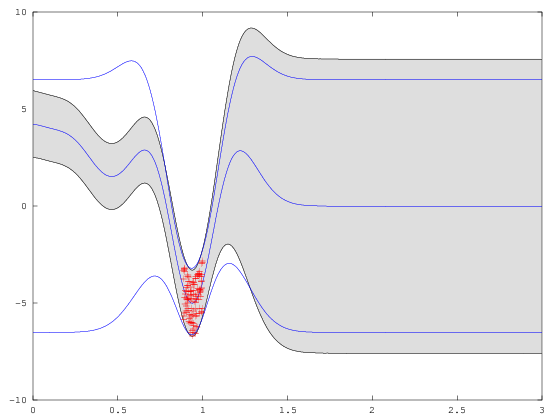

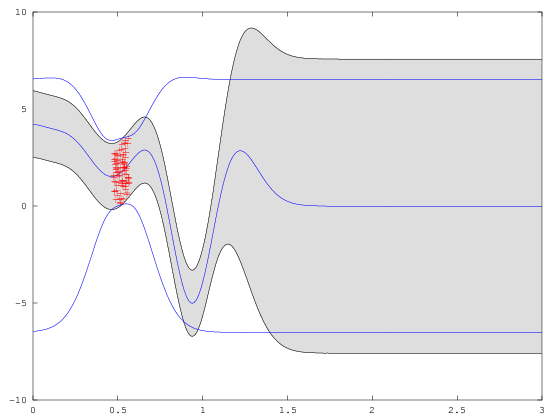

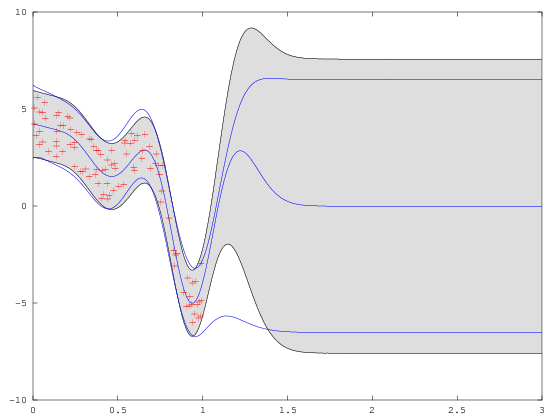

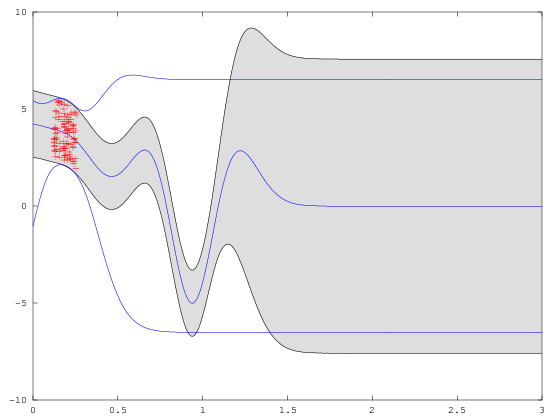

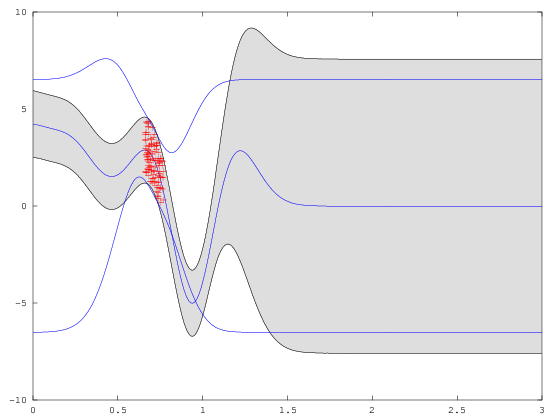

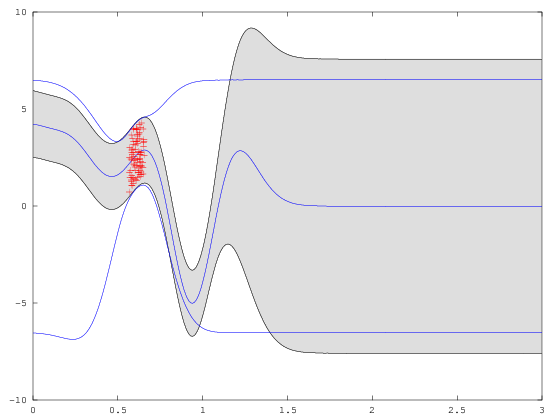

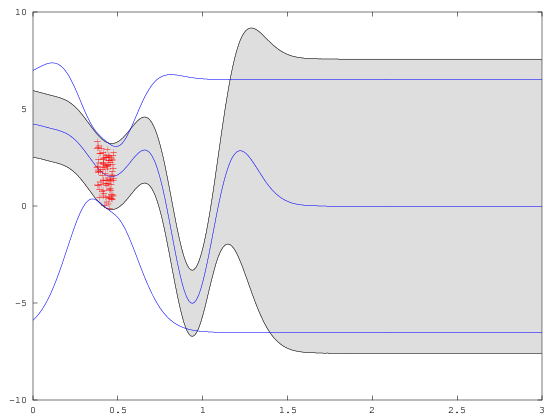

In [13]:
for i=1:10
    [tmu,ts2] = gp(models{i}.hyp,models{i}.inffunc,models{i}.meanfunc, ...
                                   models{i}.covfunc,models{i}.likfunc,models{i}.X_norm,models{i}.Y_norm,xs);
    figure; hold on; 
    f = [mu+2*sqrt(s2); flipdim(mu-2*sqrt(s2),1)];
    fill([xs; flipdim(xs,1)], f, [7 7 7]/8)
    plot(xs, mu); plot(models{i}.X, models{i}.Y, 'r+');
    plot(xs, tmu+2*sqrt(ts2)); plot(xs, tmu-2*sqrt(ts2));
endfor

## Different q cause very different results

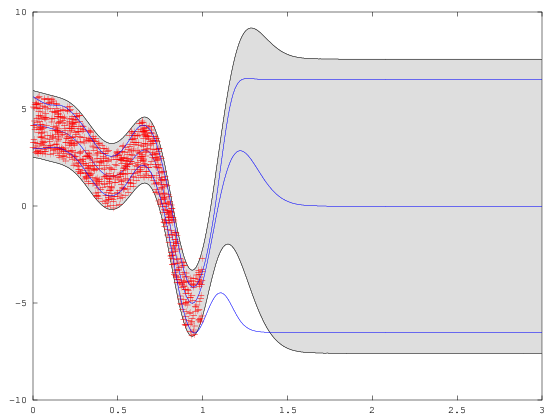

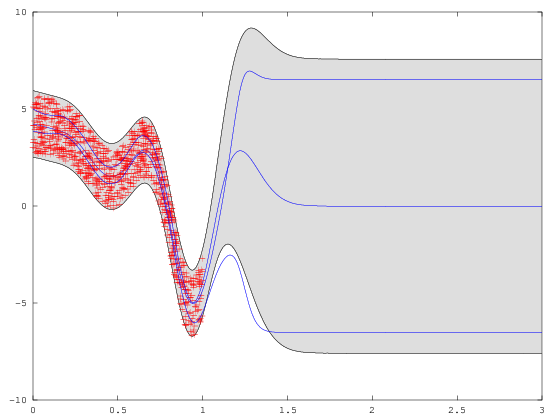

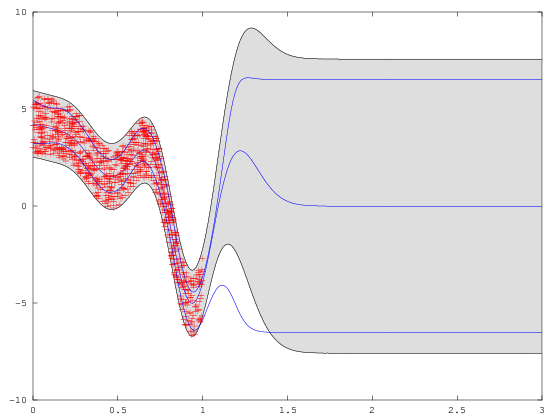

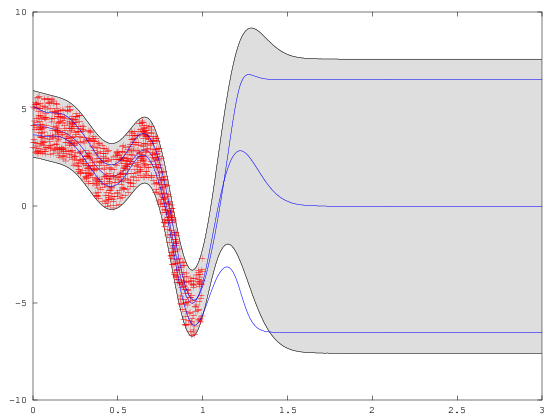

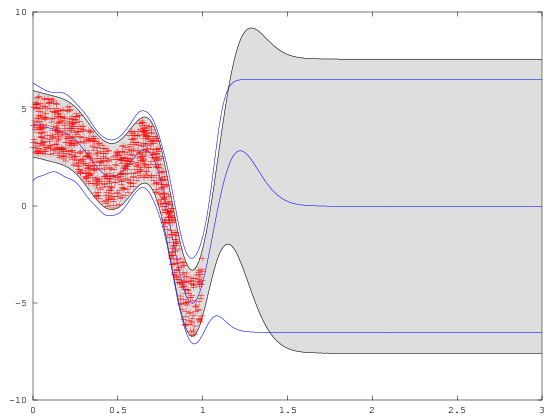

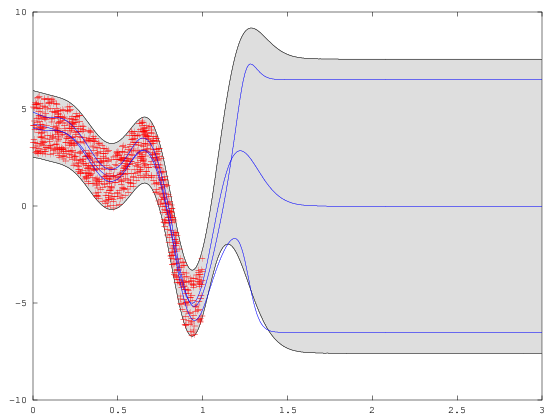

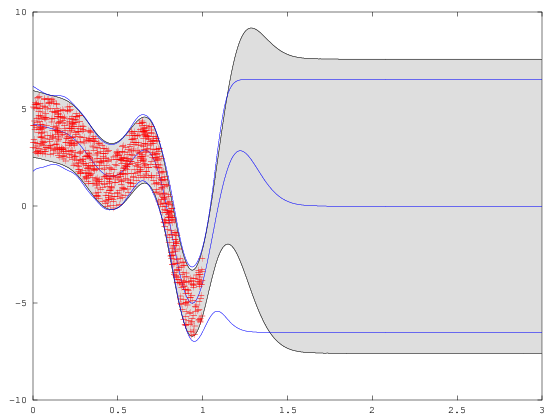

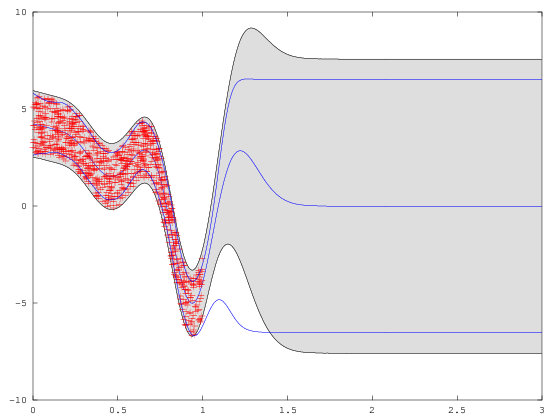

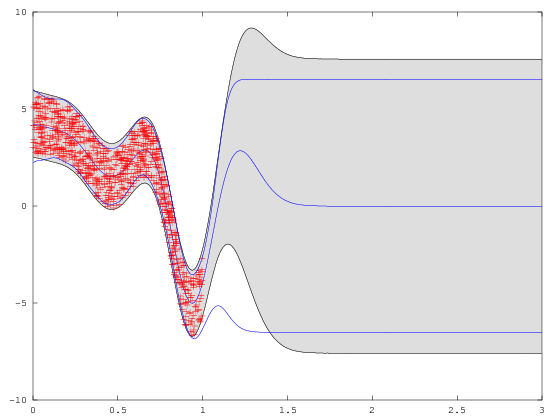

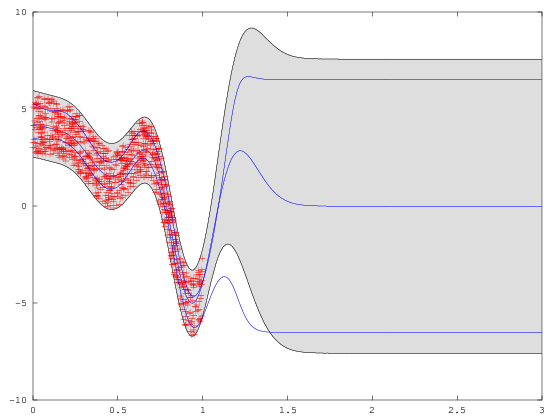

In [18]:
criterion = 'TERBCM';

for q=0.2:0.2:2.0
    [tmu,ts2,t_dGP_predict] = aggregation_predict(xs,models,criterion, q);
    figure; hold on; 
    f = [mu+2*sqrt(s2); flipdim(mu-2*sqrt(s2),1)];
    fill([xs; flipdim(xs,1)], f, [7 7 7]/8)
    plot(xs, mu); plot(x, y, 'r+');
    plot(xs, tmu+2*sqrt(ts2)); plot(xs, tmu-2*sqrt(ts2));
endfor

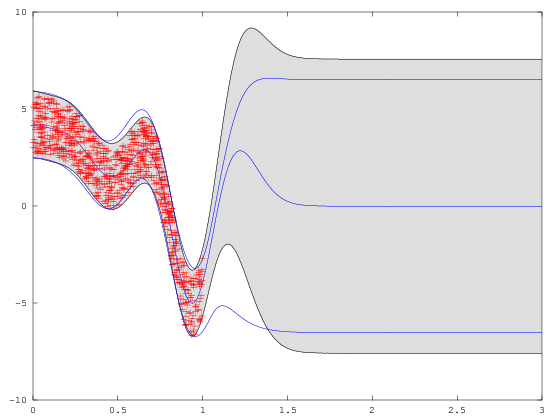

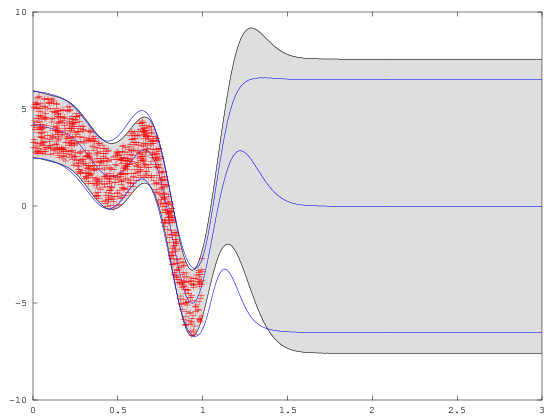

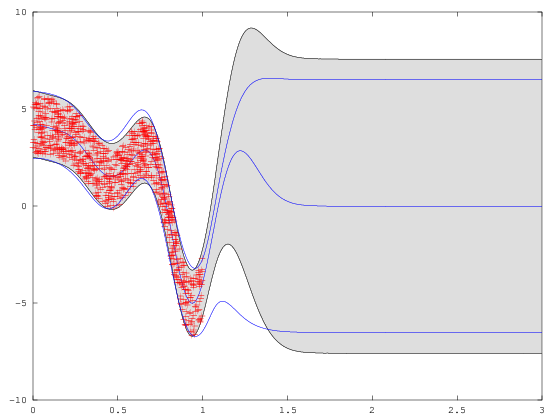

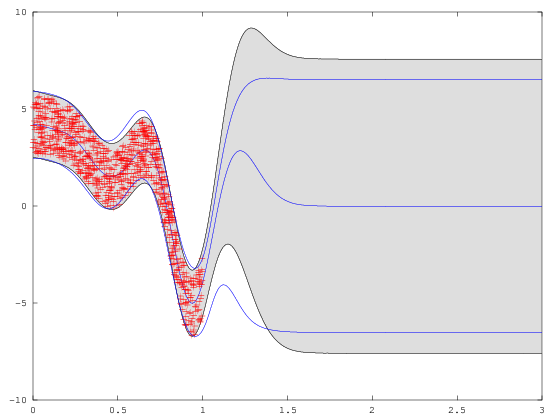

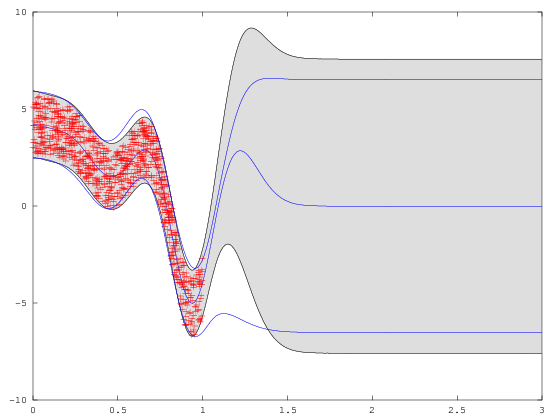

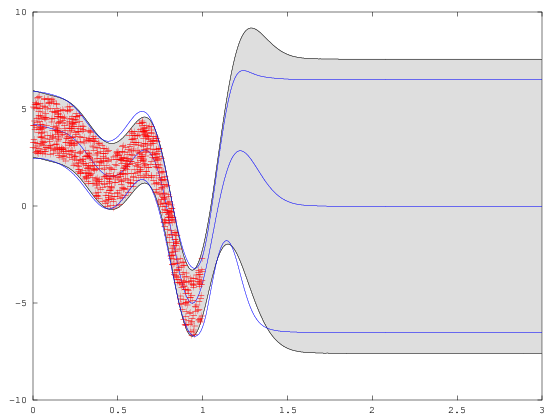

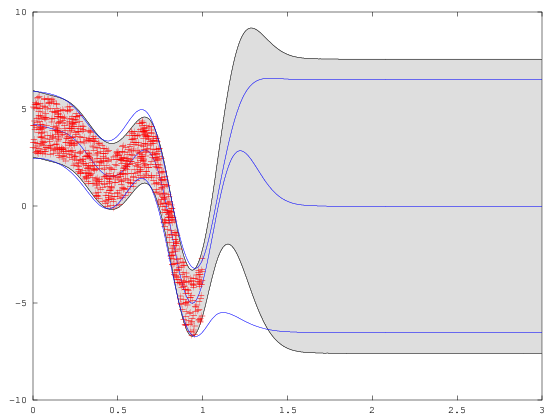

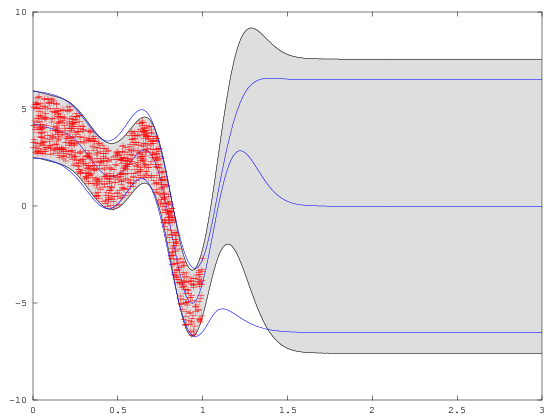

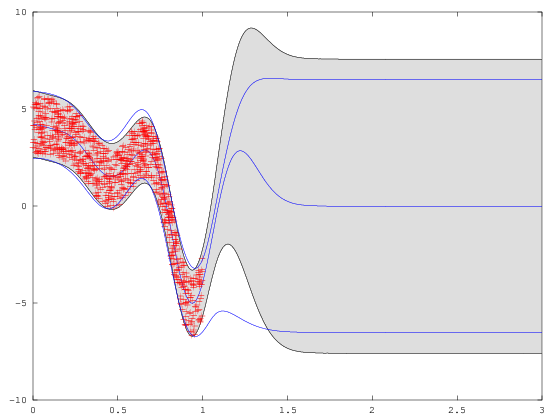

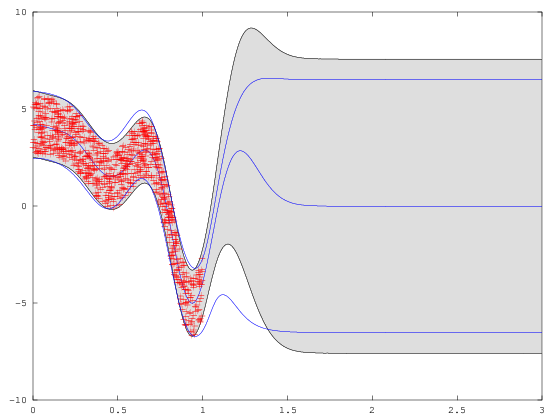

In [19]:
criterion = 'TEGRBCM';

for q=0.2:0.2:2.0
    [tmu,ts2,t_dGP_predict] = aggregation_predict(xs,models,criterion, q);
    figure; hold on; 
    f = [mu+2*sqrt(s2); flipdim(mu-2*sqrt(s2),1)];
    fill([xs; flipdim(xs,1)], f, [7 7 7]/8)
    plot(xs, mu); plot(x, y, 'r+');
    plot(xs, tmu+2*sqrt(ts2)); plot(xs, tmu-2*sqrt(ts2));
endfor

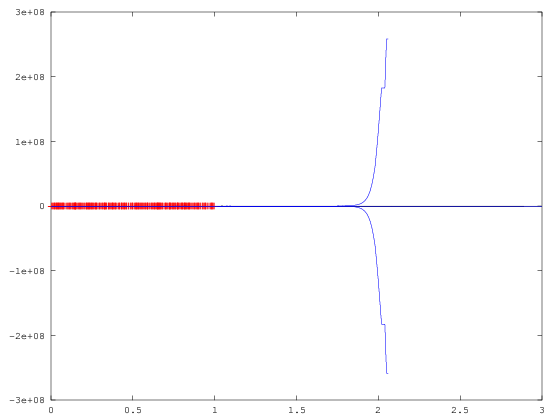

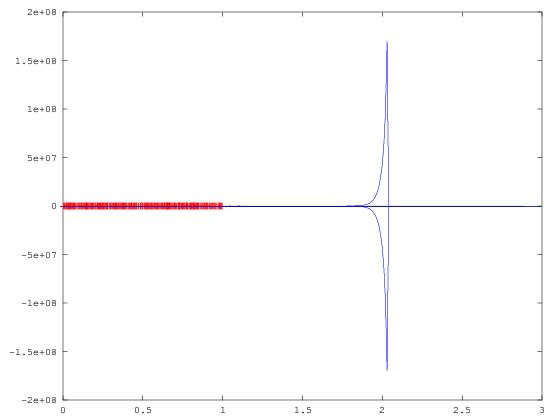

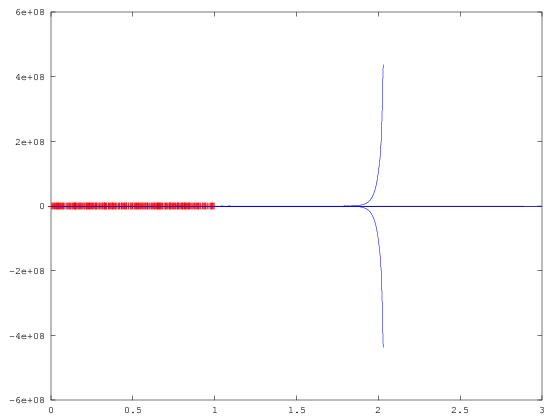

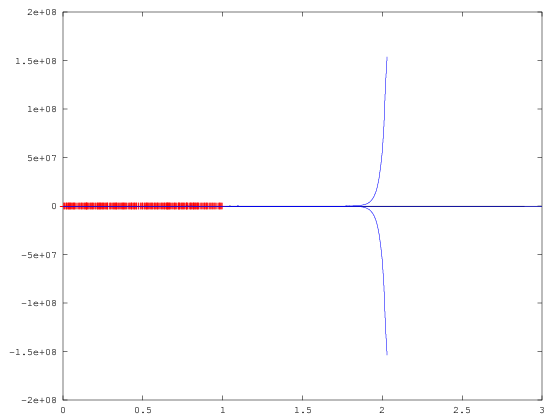

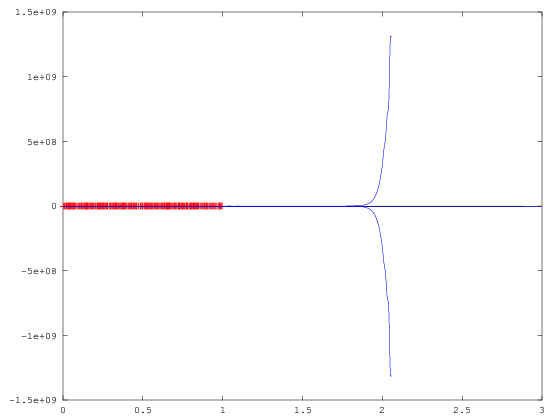

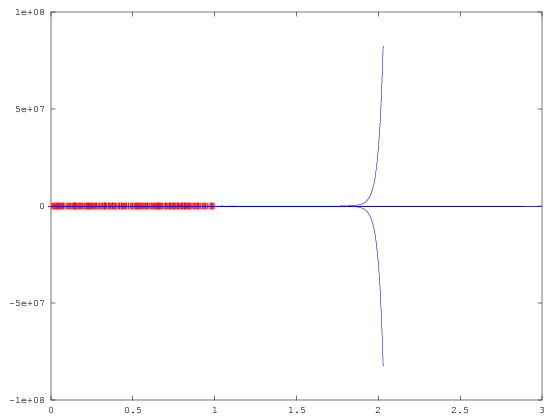

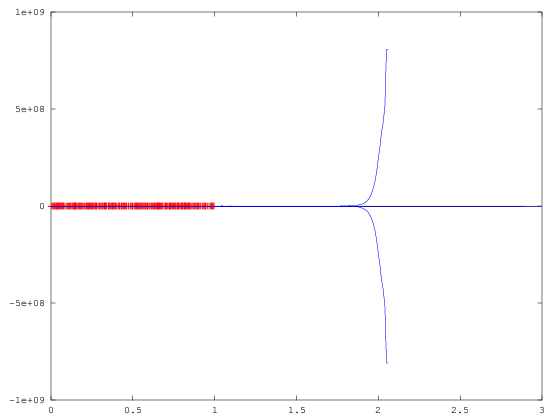

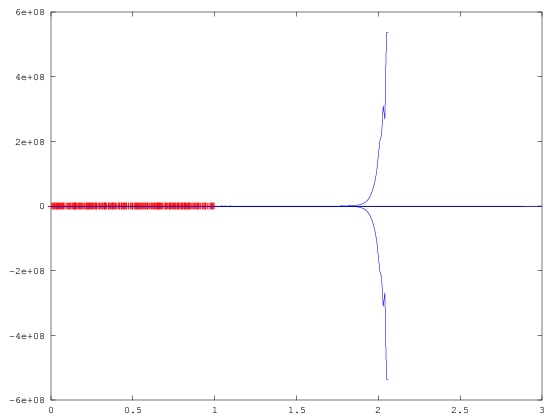

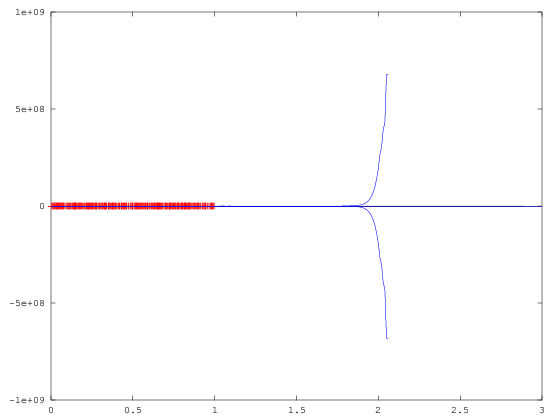

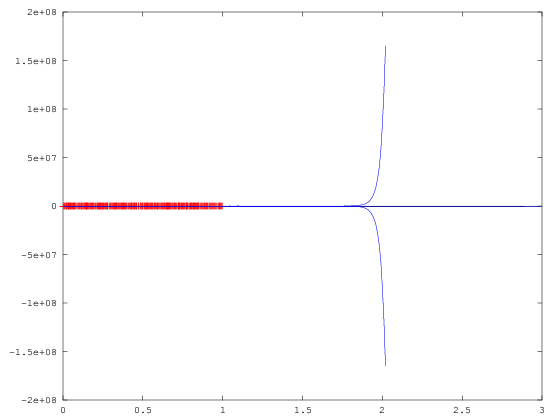

In [21]:
criterion = 'TEGPoE';

for q=0.2:0.2:2.0
    [tmu,ts2,t_dGP_predict] = aggregation_predict(xs,models,criterion, q);
    figure; hold on; 
    f = [mu+2*sqrt(s2); flipdim(mu-2*sqrt(s2),1)];
    fill([xs; flipdim(xs,1)], f, [7 7 7]/8)
    plot(xs, mu); plot(x, y, 'r+');
    plot(xs, tmu+2*sqrt(ts2)); plot(xs, tmu-2*sqrt(ts2));
endfor

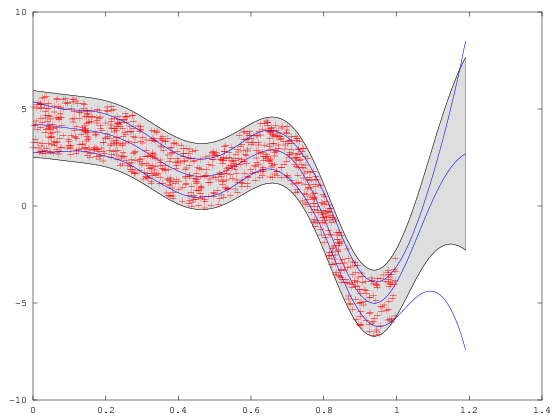

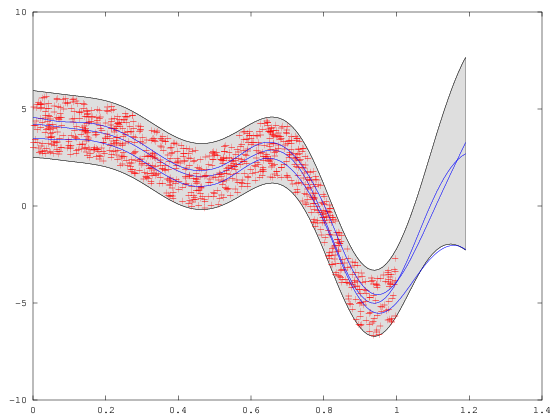

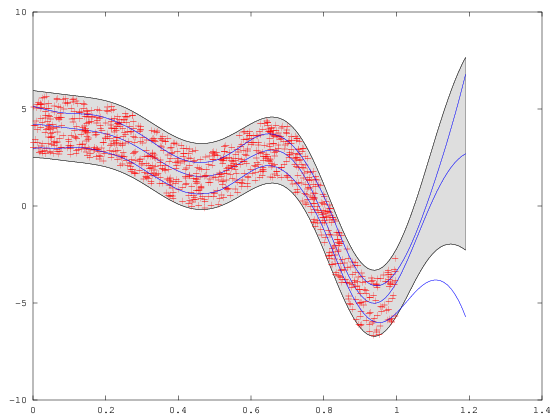

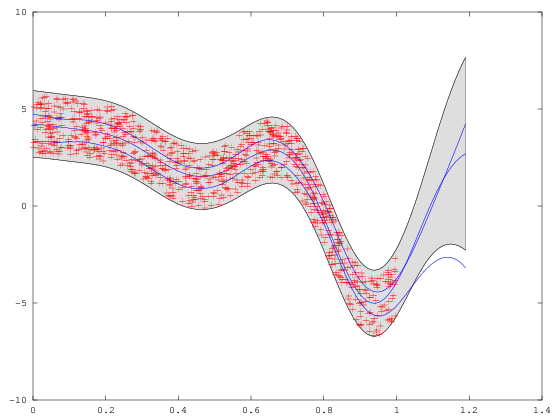

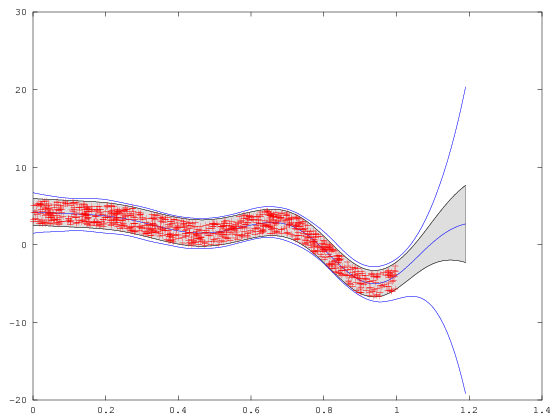

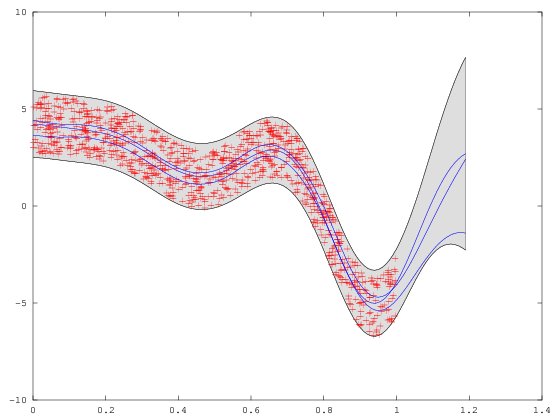

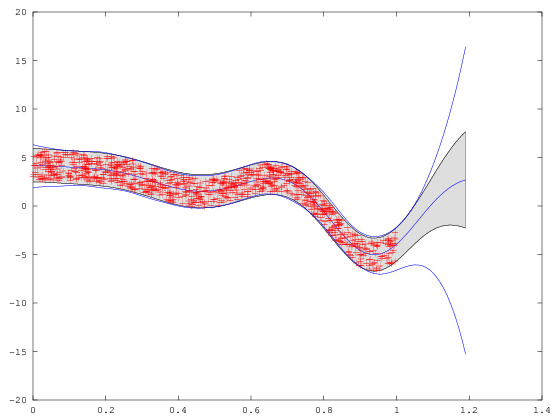

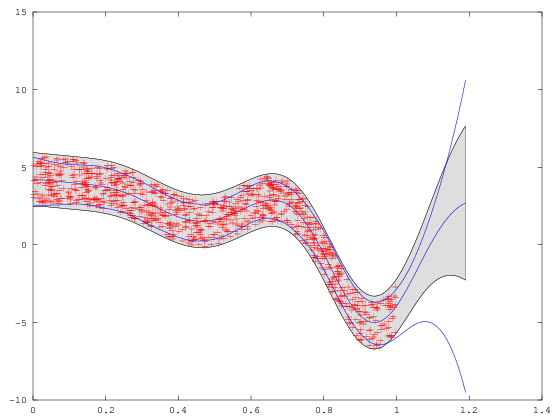

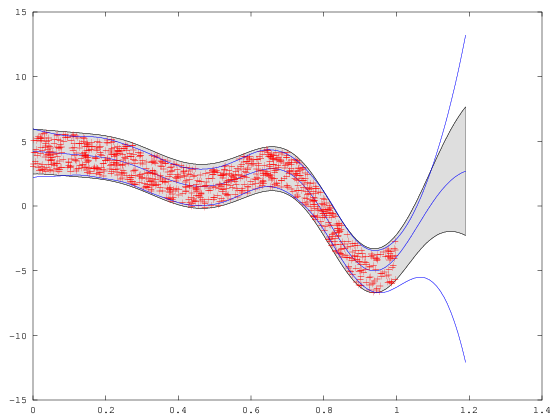

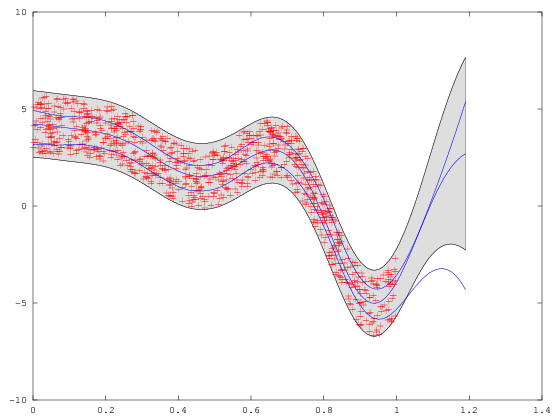

In [25]:
criterion = 'TEGPoE';

for q=0.2:0.2:2.0
    [tmu,ts2,t_dGP_predict] = aggregation_predict(xs,models,criterion, q);
    figure; hold on; 
    f = [mu(1:120)+2*sqrt(s2(1:120)); flipdim(mu(1:120)-2*sqrt(s2(1:120)),1)];
    fill([xs(1:120); flipdim(xs(1:120),1)], f, [7 7 7]/8)
    plot(xs(1:120), mu(1:120)); plot(x, y, 'r+');
    plot(xs(1:120), tmu(1:120)+2*sqrt(ts2(1:120))); plot(xs(1:120), tmu(1:120)-2*sqrt(ts2(1:120)));
endfor

# 2. Energy data

## 2.1 Find q, NormY = N

In [35]:
dataset = 'energy_data';

partitionCriterions = {'kmeans'}; % 'random', 'kmeans', 'knkmeans'
criterions = {'TERBCM'}; %, 'TEGRBCM' 'TEGPoE'};
qs = 0.2:0.2:3.0;
ax = qs;
ysmse = zeros(1, length(ax)); ymsll = zeros(1, length(ax)); ynlpd = zeros(1, length(ax));

tmp = 1;

for i = 1:length(partitionCriterions)
    partitionCriterion = partitionCriterions{i};
    for j = 1:length(criterions)     
        criterion = criterions{j};
        for q = qs
            filename = sprintf('./res/%s_%s_%s_%6.2f.mat', dataset, partitionCriterion, criterion, q);
            s = load(filename);
            ysmse(tmp) = s.SMSE; ymsll(tmp) = s.MSLL; ynlpd(tmp) = s.NLPD;
            tmp += 1;
        endfor
    endfor
endfor

In [43]:
qq = 1.0421;

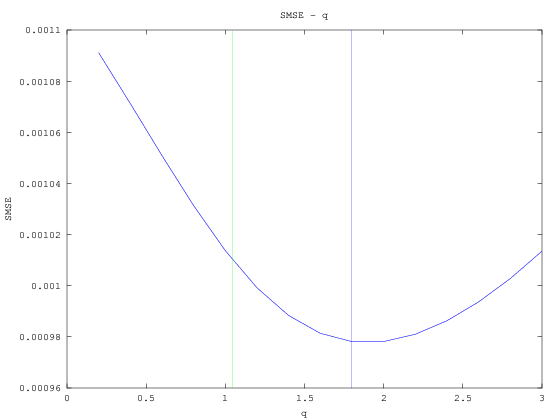

In [49]:
figure
miny = 0.00096; maxy = 0.0011;
[~, optq] = min(ysmse);
plot (ax, ysmse); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("SMSE"); 
title ("SMSE - q");

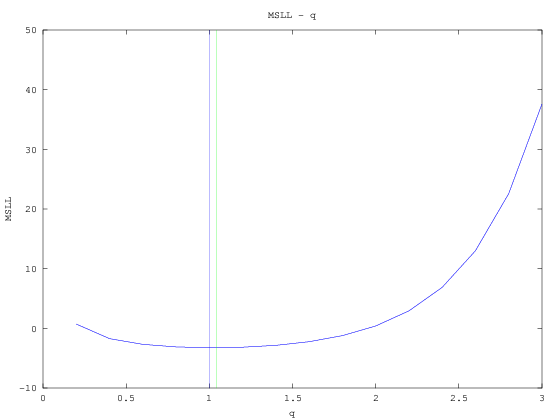

In [45]:
figure
miny = -10; maxy = 50;
[~, optq] = min(ymsll);
plot (ax, ymsll); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("MSLL"); 
title ("MSLL - q");

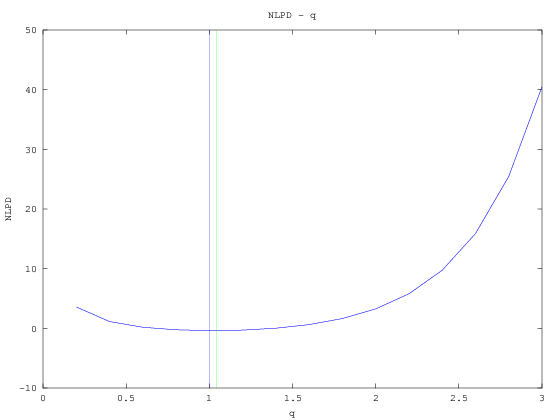

In [46]:
figure
miny = -10; maxy = 50;
[~, optq] = min(ynlpd);
plot (ax, ynlpd); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("NLPD"); 
title ("NLPD - q");

## 2.1 Find q, NormY = Y

In [1]:
dataset = 'energy_data';

partitionCriterions = {'kmeans'}; % 'random', 'kmeans', 'knkmeans'
criterions = {'TERBCM'}; %, 'TEGRBCM' 'TEGPoE'};
qs = 0.2:0.2:3.0;
ax = qs;
ysmse = zeros(1, length(ax)); ymsll = zeros(1, length(ax)); ynlpd = zeros(1, length(ax));

tmp = 1;

for i = 1:length(partitionCriterions)
    partitionCriterion = partitionCriterions{i};
    for j = 1:length(criterions)     
        criterion = criterions{j};
        for q = qs
            filename = sprintf('./res/%s_%s_%s_%6.2f.mat', dataset, partitionCriterion, criterion, q);
            s = load(filename);
            ysmse(tmp) = s.SMSE; ymsll(tmp) = s.MSLL; ynlpd(tmp) = s.NLPD;
            tmp += 1;
        endfor
    endfor
endfor

In [8]:
qq = 0.4929;

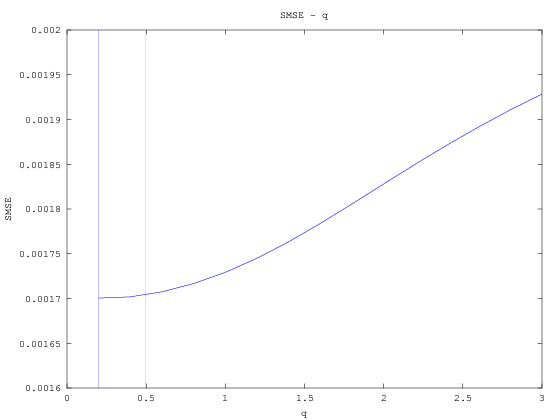

In [9]:
figure
miny = 0.0016; maxy = 0.0020;
[~, optq] = min(ysmse);
plot (ax, ysmse); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("SMSE"); 
title ("SMSE - q");

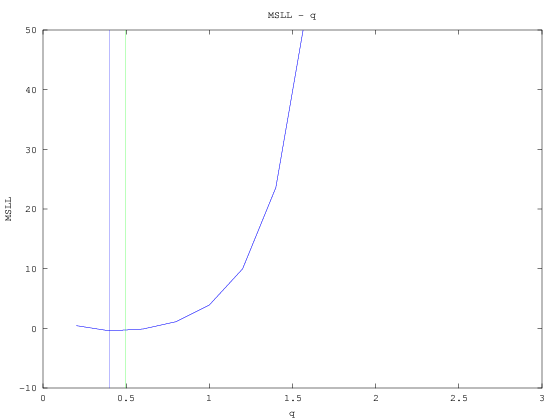

In [10]:
figure
miny = -10; maxy = 50;
[~, optq] = min(ymsll);
plot (ax, ymsll); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("MSLL"); 
title ("MSLL - q");

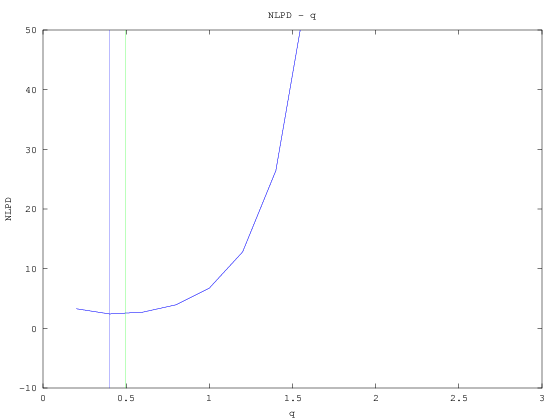

In [11]:
figure
miny = -10; maxy = 50;
[~, optq] = min(ynlpd);
plot (ax, ynlpd); 
line ([ax(optq),ax(optq)], [miny,maxy], "color", "blue");
line ([qq,qq], [miny,maxy], "color", "green");
ylim([miny, maxy]);
xlabel ("q"); 
ylabel ("NLPD"); 
title ("NLPD - q");

## 2.2 Multi-q
hist of 50 q

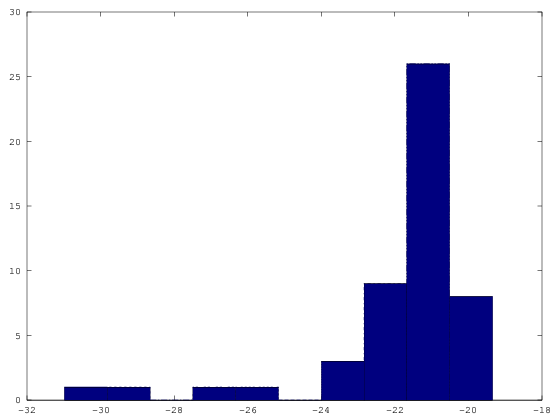

In [13]:
s = load('./res/energydataqs');
qs = s.qs;
hist (qs, 10);

# 3. Protein

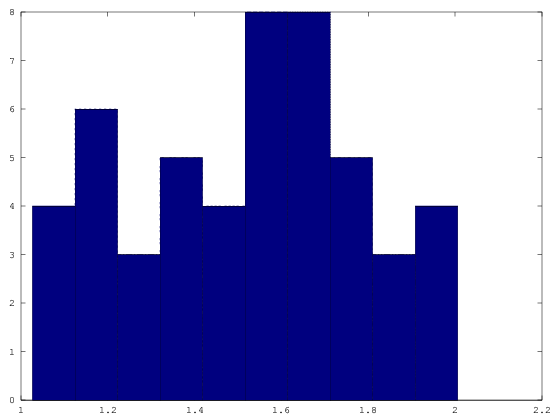

In [14]:
s = load('./res/proteinqs');
qs = s.qs;
hist (qs, 10);

# 4. Video

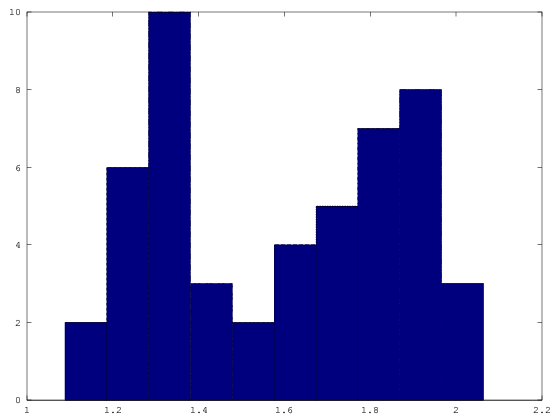

In [15]:
s = load('./res/videoqs');
qs = s.qs;
hist (qs, 10);

# Bar Plot

energy_smse =

   0.0017000   0.0017000   0.0017000   0.0033000
   0.0017000   0.0017000   0.0017000   0.0033000



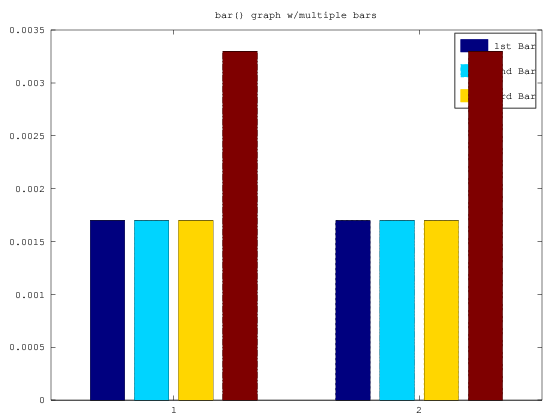

In [29]:
energy_smse = [0.0017, 0.0017, 0.0017, 0.0033;0.0017, 0.0017, 0.0017, 0.0033] %  shannon, tsallis, 1 q, 50 q 
 h = bar (energy_smse);
  legend ({"1st Bar", "2nd Bar", "3rd Bar"});
 title ("bar() graph w/multiple bars");

rand_2x3_data1 =

   0.341447   0.171220   0.284370
   0.039773   0.731725   0.779382



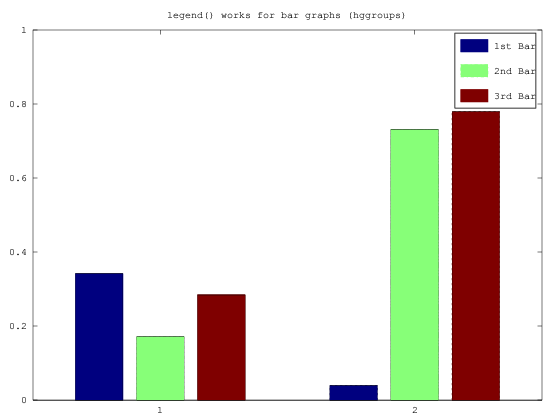

In [25]:
 rand_2x3_data1 = [0.341447, 0.171220, 0.284370; 0.039773, 0.731725, 0.779382]
 bar (rand_2x3_data1);
 ylim ([0 1.0]);
 title ("legend() works for bar graphs (hggroups)");
 legend ({"1st Bar", "2nd Bar", "3rd Bar"});